# $\LARGE Linear Regression$

# Act 1 - Read Data
#### Import the usual 4  packages!

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 1.1 Read theelectric motor data from "Data/ElectricMotor/measures_v2.csv" and call it "el", use read_csv
- print columns
- print the head(3)!

In [3]:
el = pd.read_csv('Data/ElectricMotor/measures_v2.csv')

In [4]:
el.columns

Index(['u_q', 'coolant', 'stator_winding', 'u_d', 'stator_tooth',
       'motor_speed', 'i_d', 'i_q', 'pm', 'stator_yoke', 'ambient', 'torque',
       'profile_id'],
      dtype='object')

In [54]:
el.head(3)

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.08667,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.09239,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.08938,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17


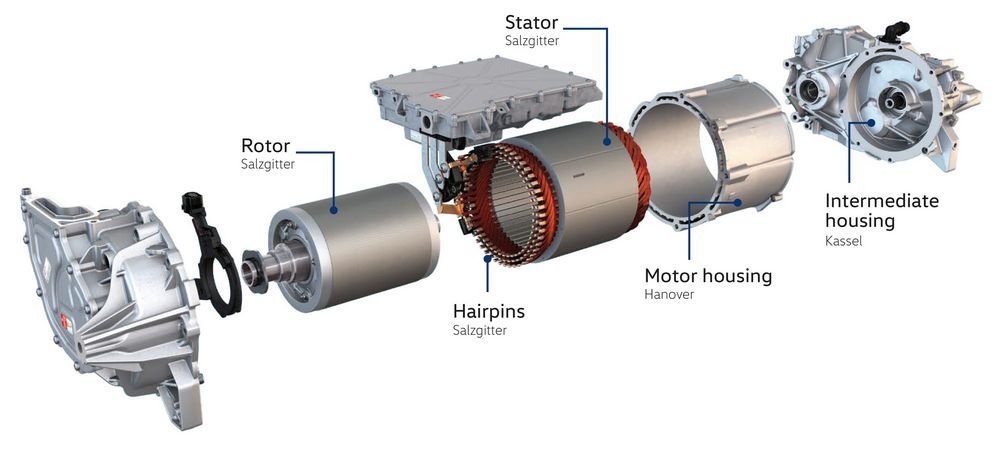

read more about the data here: https://www.kaggle.com/datasets/wkirgsn/electric-motor-temperature

# Act 2 - A few plotting
#### 2.1 Try to create a few plots to see how 'stator_tooth' temperature behaves!

<AxesSubplot:xlabel='stator_tooth', ylabel='stator_yoke'>

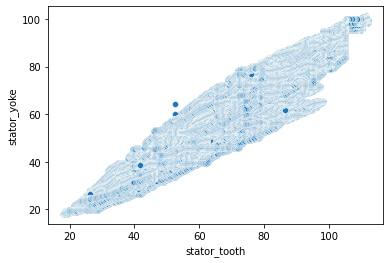

In [10]:
sns.scatterplot(x='stator_tooth', y='stator_yoke', data=el)

#### 2.2 CHALLENGING -  Use your subplot knowledge to plot everything vs the temperature of 'stator_yoke'!

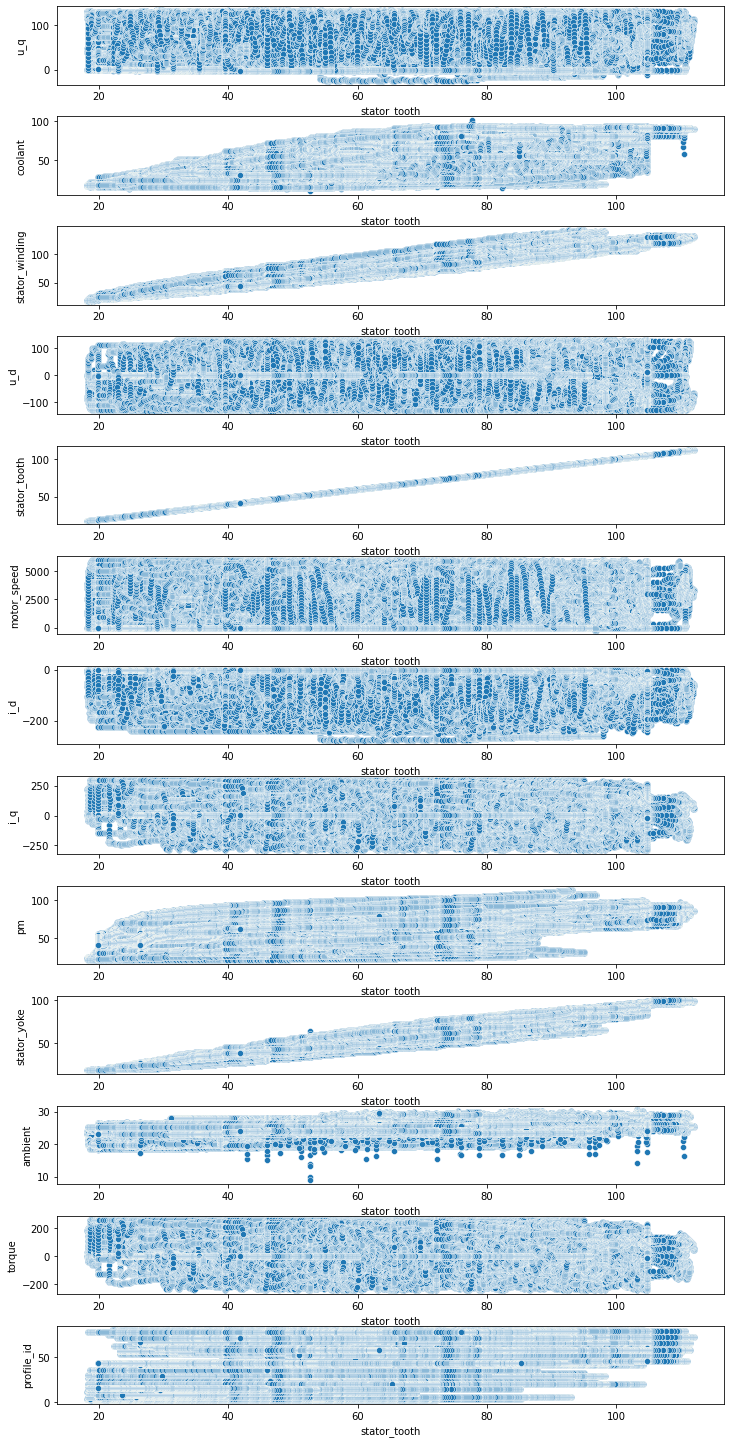

In [11]:
fig, ax =plt.subplots(len(el.columns),1, figsize=(10,20))
plt.tight_layout()

for i in range(len(el.columns)):
    sns.scatterplot(x='stator_tooth',y=el.columns[i], data=el, ax=ax[i])

# Act 3 - Linear Regression Model  & Prediction
Let's say in real life we cannot directly measure the 'stator_tooth' temperature. However, we have access to the temperature of 'coolant', 'stator_winding', & 'stator_yoke'. Can you fit a model to these to predictthe temperature of 'strator_tooth'?

#### 3.1 Fit the model
- Create X & Y
- Split your data into training and set
- Import your linear regression model
- Fit your model to your data
- Check the coefficients 
- **What does each coefficient tell you?**
- What is the intercept?

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
el.columns

Index(['u_q', 'coolant', 'stator_winding', 'u_d', 'stator_tooth',
       'motor_speed', 'i_d', 'i_q', 'pm', 'stator_yoke', 'ambient', 'torque',
       'profile_id'],
      dtype='object')

In [12]:
X=el[['coolant', 'stator_winding', 'stator_yoke']]
y= el['stator_tooth']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lm=LinearRegression()

In [16]:
lm.fit(X_train, y_train)

LinearRegression()

Each coefficient is related to which of your parameters?

In [17]:
lm.coef_

array([-0.21471709,  0.31460637,  0.90745065])

In [18]:
lm.intercept_

0.057724063194591224

#### 3.2 Predict y$_{test}$ and evaluate your pmodel!
- Make the prediction
- A scatter plot might help to visualize your Fit. Make sure to label your axis
- Use RMSE to evaluate your fit!
- Is this a good fit? Why? Check your mean, min, & max!

In [19]:
pred=lm.predict(X_test)

Text(0, 0.5, 'Y$_{test}$')

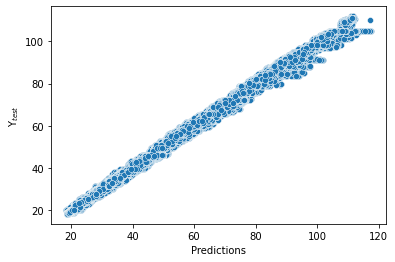

In [24]:
sns.scatterplot(x=pred, y=y_test)
plt.xlabel('Predictions')
plt.ylabel('Y$_{test}$')

In [25]:
from sklearn import metrics

In [26]:
np.sqrt(metrics.mean_squared_error(y_test, pred))

1.2374802747998104

In [27]:
np.mean(y_test), np.min(y_test), np.max(y_test)

(56.89742598798714, 18.133975982666016, 111.93974934363084)

# Act 4 - Use all the columns except the 'profile_id' to create a linear model!
#### 4.1 Create a model and fit x-train!
- Create X & Y
- Split your data into training and set
- Fit your model to your data
- Check the coefficients 
- Make sure to create a data frame of it! It just looks nicer!
- **What does each coefficient tell you? Which one is more effective? Sort them!**
- What is the intercept?

In [28]:
el.columns

Index(['u_q', 'coolant', 'stator_winding', 'u_d', 'stator_tooth',
       'motor_speed', 'i_d', 'i_q', 'pm', 'stator_yoke', 'ambient', 'torque',
       'profile_id'],
      dtype='object')

In [32]:
X=el[['u_q', 'coolant', 'stator_winding', 'u_d',
       'motor_speed', 'i_d', 'i_q', 'pm', 'stator_yoke', 'ambient', 'torque']]
y= el['stator_tooth']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [34]:
lm=LinearRegression()

In [36]:
lm.fit(X_train, y_train)

LinearRegression()

In [37]:
lm.coef_

array([-1.00294448e-03, -1.27847707e-01,  3.67038297e-01, -5.45532754e-03,
        5.00332906e-04,  9.88967891e-03,  7.67632301e-03,  4.22466795e-02,
        7.26235888e-01, -9.27194201e-04, -1.43401445e-02])

In [38]:
lm.intercept_

-0.6305209053928706

In [41]:
pd.DataFrame(data=lm.coef_,index=X.columns, columns=['Coefficients'])

,Coefficients
u_q,-0.001003
coolant,-0.127848
stator_winding,0.367038
u_d,-0.005455
motor_speed,0.000500
i_d,0.009890
i_q,0.007676
pm,0.042247
stator_yoke,0.726236
ambient,-0.000927


In [52]:
pd.DataFrame(data=lm.coef_,index=X.columns, columns=['Coefficients']).sort_values(by='Coefficients', ascending=False)

,Coefficients
stator_yoke,0.726236
stator_winding,0.367038
pm,0.042247
i_d,0.009890
i_q,0.007676
motor_speed,0.000500
ambient,-0.000927
u_q,-0.001003
u_d,-0.005455
torque,-0.014340


#### 4.2 Predict y$_{test}$ and evaluate your model!
- Make the prediction
- A scatter plot might help to visualize your Fit. Make sure to label your axis
- Use RMSE to evaluate your fit!
- Is this a good fit? Why? Check your mean, min, & max!
- How do you compare your RMSE to the previous Act (i.e. 3)? Does your complex model helped to improve dramatically?

In [42]:
pred=lm.predict(X_test)

Text(0, 0.5, 'Y$_{test}$')

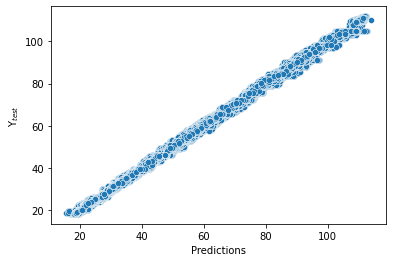

In [53]:
sns.scatterplot(x=pred, y=y_test)
plt.xlabel('Predictions')
plt.ylabel('Y$_{test}$')

In [43]:
np.sqrt(metrics.mean_squared_error(y_test, pred))

0.7494847231376646

In [45]:
y.mean(), y.min(), y.max()

(56.87858199679993, 18.133975982666016, 111.94642341392526)

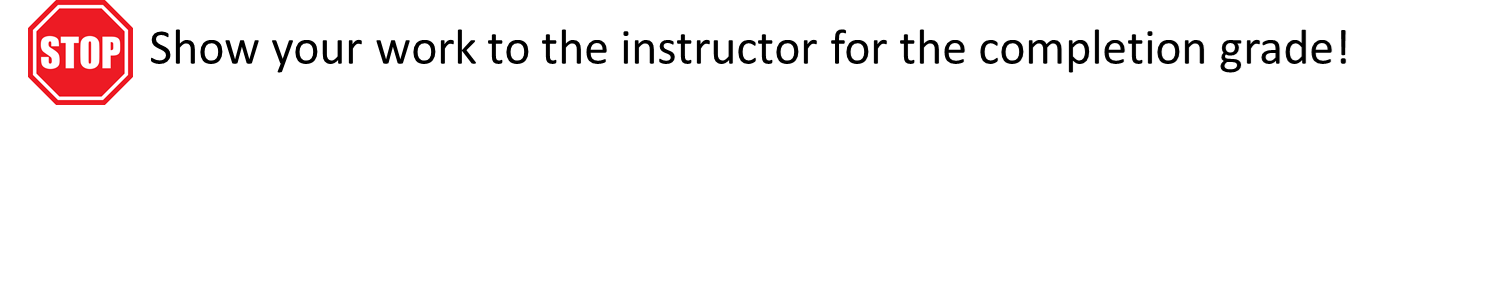